In [1]:
#Install Qiskit
!pip install qiskit

     |████████████████████████████████| 8.5MB 11.9MB/s 
     |████████████████████████████████| 17.6MB 252kB/s 
     |████████████████████████████████| 204kB 42.7MB/s 
     |████████████████████████████████| 204kB 44.4MB/s 
     |████████████████████████████████| 2.1MB 41.4MB/s 
     |████████████████████████████████| 1.3MB 43.6MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 5.9MB 40.7MB/s 
     |████████████████████████████████| 194kB 43.9MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 583kB 38.8MB/s 
     |████████████████████████████████| 3.2MB 31.7MB/s 
     |████████████████████████████████| 5.5MB 39.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.6-cp37-none-any.whl size=2882 sha256=e9231dd121b471c9e8c579d6b8b57bbba30662b66c9462679e5d15bb380f4310
  Stored in directory: /root/.cache/pip/wheels/b1/5e/2a/a9afb84cb4e8a08ea994982aaf040b2c668ef5fee81430f1f5
  Created wheel fo

In [23]:
# Import stuff
#numpy for formating numbers
import numpy as np
#The types of circuit parts
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
#Meta circuit parts (running them)
from qiskit import IBMQ, Aer, transpile, assemble
#Visualizing the end results
from qiskit.visualization import plot_histogram, plot_bloch_multivector
#For initializing a qubit
from qiskit.extensions import Initialize

In [3]:
#First I'm going to build the circuit up from the ground up. Part by part
#Create the 3 lanes of quantum
qr = QuantumRegister(3, name="q")

#Create 2 classical lanes (AKA regular bits)
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")

#Then put them all together
tc = QuantumCircuit(qr, crz, crx)

In [4]:
#So we're going to do quantum teleportation! First part = entagled particles, part 2 = Alice doing stuff, part 3 = Bob gets the qubit and then rotates it in place

In [5]:
#Drawwing out the circuit. It's blank right now because we have nothing on it (it's just the lanes)
tc.draw()

q_0: 
       
  q_1: 
       
  q_2: 
       
crz: 1/
       
crx: 1/

In [6]:
#Create a Hadarmard at qubit 1, then a CNOT from 1 to 2
tc.h(1)
tc.cx(1,2)

In [7]:
#Draw it out
tc.draw()

q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

In [8]:
#That was the part of the circuit was part 1, the entangled particles generator. AKA they both will result in a 0 or a 1
#Barrier doesn't do anything (functionally in here (I think they do have some utility later down the line, but don't quote me on that)). Only visually seperates the parts
tc.barrier()

In [9]:
tc.draw()

░ 
  q_0: ───────────░─
       ┌───┐      ░ 
  q_1: ┤ H ├──■───░─
       └───┘┌─┴─┐ ░ 
  q_2: ─────┤ X ├─░─
            └───┘ ░ 
crz: 1/═════════════
                    
crx: 1/═════════════

In [10]:
#Part 2. AKA operations that Alice does on her 2 qubits

#Define a CNOT from qubit 0 to qubit 1
tc.cx(0,1)
#And a Hardamard on her original qubit
tc.h(0)

In [11]:
tc.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

In [12]:
#Measure accross Z on the first qubit. Result = the Classical circuit registerer for z
tc.measure(0, crz)
#measure across X on the second qubit. Result = the Classical circuit registerer for x
tc.measure(1, crx)

In [13]:
tc.draw()

░      ┌───┐┌─┐
  q_0: ───────────░───■──┤ H ├┤M├
       ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘
  q_1: ┤ H ├──■───░─┤ X ├─┤M├──╫─
       └───┘┌─┴─┐ ░ └───┘ └╥┘  ║ 
  q_2: ─────┤ X ├─░────────╫───╫─
            └───┘ ░        ║   ║ 
crz: 1/════════════════════╬═══╩═
                           ║   0 
                           ║     
crx: 1/════════════════════╩═════
                           0

In [14]:
#End of part 2
tc.barrier()

In [15]:
tc.draw()

░      ┌───┐┌─┐ ░ 
  q_0: ───────────░───■──┤ H ├┤M├─░─
       ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░ 
  q_1: ┤ H ├──■───░─┤ X ├─┤M├──╫──░─
       └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ 
  q_2: ─────┤ X ├─░────────╫───╫──░─
            └───┘ ░        ║   ║  ░ 
crz: 1/════════════════════╬═══╩════
                           ║   0    
                           ║        
crx: 1/════════════════════╩════════
                           0

In [16]:
#We flip it across Z if qubit 0 measured a 1 for z
tc.z(2).c_if(crz,1)
#We flip it across X if qubit 1 measured a 1 for x
tc.x(2).c_if(crx,1)

In [17]:
tc.draw()

░      ┌───┐┌─┐ ░               
  q_0: ───────────░───■──┤ H ├┤M├─░───────────────
       ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░               
  q_1: ┤ H ├──■───░─┤ X ├─┤M├──╫──░───────────────
       └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────╫───╫──░──┤ Z ├──┤ X ├─
            └───┘ ░        ║   ║  ░  └─┬─┘  └─┬─┘ 
                           ║   ║    ┌──┴──┐   │   
crz: 1/════════════════════╬═══╩════╡ = 1 ╞═══╪═══
                           ║   0    └─────┘┌──┴──┐
crx: 1/════════════════════╩═══════════════╡ = 1 ╞
                           0               └─────┘

In [18]:
#State the simulator 
sim = Aer.get_backend("statevector_simulator")

In [19]:
# Just makes sure that our circuit is good to go to be simulated and ran through
qc = assemble(tc)

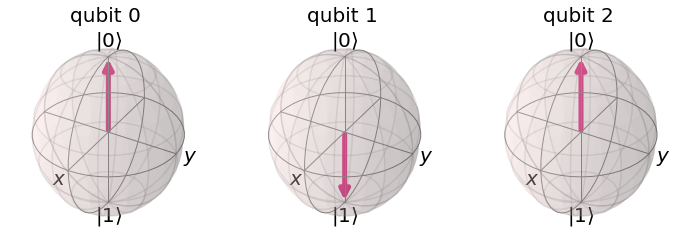

In [20]:
#Get the statevector of a the end results of our qubits
result = sim.run(qc).result().get_statevector()
#Then we plot them as bloch vectors
plot_bloch_multivector(result)

In [37]:
#It works! Qubit 2 is always the same (0) so it teleported qubit 0 to qubit 2

In [38]:
#Let's put it all together (so it doesn't look so messy) with a less boring initialization of qubit 0
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
tc = QuantumCircuit(qr, crz, crx)

In [39]:
#Define the state of a qubit
psi = [0.8,0.6]

In [40]:
#A gate that rotates our qubit to that value
init_gate = Initialize(psi)
#Naming the gate
init_gate.label = "init"

In [41]:
tc.h(1)
tc.cx(1,2)
#New part of initalizing
tc.append(init_gate, [0])
tc.barrier()
tc.cx(0,1)
tc.h(0)
tc.measure(0, crz)
tc.measure(1, crx)
tc.barrier()
tc.z(2).c_if(crz,1)
tc.x(2).c_if(crx,1)

In [42]:
#Looking good
tc.draw()

┌──────┐      ░      ┌───┐┌─┐ ░               
  q_0: ┤ init ├──────░───■──┤ H ├┤M├─░───────────────
       └┬───┬─┘      ░ ┌─┴─┐└┬─┬┘└╥┘ ░               
  q_1: ─┤ H ├────■───░─┤ X ├─┤M├──╫──░───────────────
        └───┘  ┌─┴─┐ ░ └───┘ └╥┘  ║  ░  ┌───┐  ┌───┐ 
  q_2: ────────┤ X ├─░────────╫───╫──░──┤ Z ├──┤ X ├─
               └───┘ ░        ║   ║  ░  └─┬─┘  └─┬─┘ 
                              ║   ║    ┌──┴──┐   │   
crz: 1/═══════════════════════╬═══╩════╡ = 1 ╞═══╪═══
                              ║   0    └─────┘┌──┴──┐
crx: 1/═══════════════════════╩═══════════════╡ = 1 ╞
                              0               └─────┘

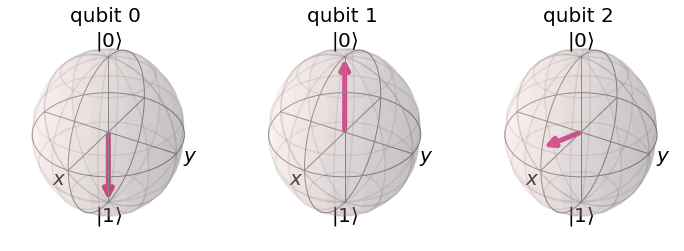

In [43]:
qc = assemble(tc)
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

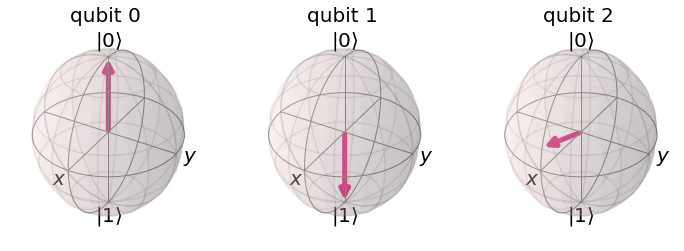

In [44]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

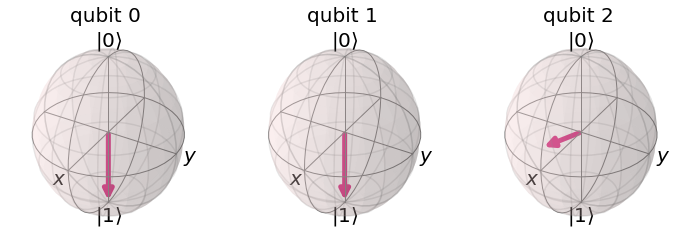

In [45]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

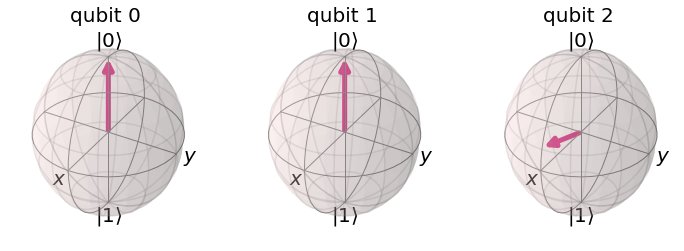

In [50]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

In [51]:
#Yay! Qubit 2 is always the same, and as you can see, qubit 0 and 1 can be different!

#One problem, in a real simulator, we can't actually just get the statevector of a qubit. It's impossible to know the exact orientation of our qubit (that's why we do quantum teleportation)
#So we have another way of doing it....

In [53]:
#We create an inverse gate. We then attatch this to our circuit...
inverse_init_gate = init_gate.gates_to_uncompute()

In [54]:
#Redefining
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
tc = QuantumCircuit(qr, crz, crx)

In [55]:
tc.h(1)
tc.cx(1,2)
tc.append(init_gate, [0])
tc.barrier()
tc.cx(0,1)
tc.h(0)
tc.measure(0, crz)
tc.measure(1, crx)
tc.barrier()
tc.z(2).c_if(crz,1)
tc.x(2).c_if(crx,1)
#New part of initalizing
tc.append(inverse_init_gate, [2])

In [56]:
#Looking good
tc.draw()

┌──────┐      ░      ┌───┐┌─┐ ░                               
  q_0: ┤ init ├──────░───■──┤ H ├┤M├─░───────────────────────────────
       └┬───┬─┘      ░ ┌─┴─┐└┬─┬┘└╥┘ ░                               
  q_1: ─┤ H ├────■───░─┤ X ├─┤M├──╫──░───────────────────────────────
        └───┘  ┌─┴─┐ ░ └───┘ └╥┘  ║  ░  ┌───┐  ┌───┐ ┌──────────────┐
  q_2: ────────┤ X ├─░────────╫───╫──░──┤ Z ├──┤ X ├─┤ disentangler ├
               └───┘ ░        ║   ║  ░  └─┬─┘  └─┬─┘ └──────────────┘
                              ║   ║    ┌──┴──┐   │                   
crz: 1/═══════════════════════╬═══╩════╡ = 1 ╞═══╪═══════════════════
                              ║   0    └─────┘┌──┴──┐                
crx: 1/═══════════════════════╩═══════════════╡ = 1 ╞════════════════
                              0               └─────┘

In [70]:
#Now let's store it! We're just going to add another measurement thing
resultt = ClassicalRegister(1)
#Add this to our circuit
tc.add_register(resultt)
#Then connect qubit 2 to the register
tc.measure(2,2)

CircuitError: ignored

In [58]:
tc.draw()

┌──────┐      ░      ┌───┐┌─┐ ░                                  
  q_0: ┤ init ├──────░───■──┤ H ├┤M├─░──────────────────────────────────
       └┬───┬─┘      ░ ┌─┴─┐└┬─┬┘└╥┘ ░                                  
  q_1: ─┤ H ├────■───░─┤ X ├─┤M├──╫──░──────────────────────────────────
        └───┘  ┌─┴─┐ ░ └───┘ └╥┘  ║  ░  ┌───┐  ┌───┐ ┌──────────────┐┌─┐
  q_2: ────────┤ X ├─░────────╫───╫──░──┤ Z ├──┤ X ├─┤ disentangler ├┤M├
               └───┘ ░        ║   ║  ░  └─┬─┘  └─┬─┘ └──────────────┘└╥┘
                              ║   ║    ┌──┴──┐   │                    ║ 
crz: 1/═══════════════════════╬═══╩════╡ = 1 ╞═══╪════════════════════╬═
                              ║   0    └─────┘┌──┴──┐                 ║ 
crx: 1/═══════════════════════╩═══════════════╡ = 1 ╞═════════════════╬═
                              0               └─────┘                 ║ 
 c0: 1/═══════════════════════════════════════════════════════════════╩═
                                                                      0

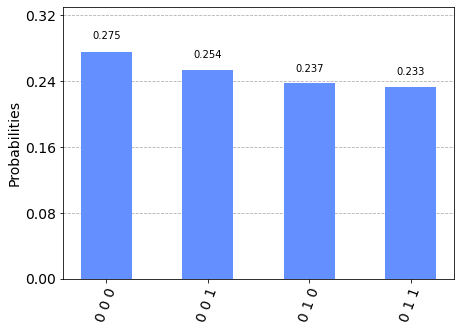

In [61]:
#Let's turn on the simulator!
#Define our simulator. This time, instead of blotch vectors, we have a real simualtor
sim = Aer.get_backend('qasm_simulator')
#Just makes sure we're clear to put into the simualtor
tcc = transpile(tc, sim)
qc = assemble(tcc)
#Run it through and get the probabilities
result = sim.run(qc).result().get_counts()
#plot the results
plot_histogram(result)

In [62]:
#Now we actually read this thing a bit backwards. It corresponds exactly with the circuit
#Thus the measurement: crz = 0 or 1, crx = 0 or 1. c0 = 0
#So when we disentagle it, we're doing the inverse of initialzing it. So if intializing it was f(x)
#The disentagler is f-1(x). The end result is the same as the result - preinitializing... Therefore the teleportaton worked!

In [63]:
#But right now we're doing it all on a simulator. Let's actually put it on a real quantum computer!!!
#We just have to modify our code a bit, since real quantum computers can't read from the classical thing

In [71]:
#Redefining
qr = QuantumRegister(3, name="q")
tc = QuantumCircuit(qr)

In [72]:
tc.h(1)
tc.cx(1,2)
tc.append(init_gate, [0])
tc.barrier()
tc.cx(0,1)
tc.h(0)
tc.barrier()
#New part of initalizing
tc.cx(1,2)
tc.cz(0,2)
tc.append(inverse_init_gate, [2])
tc.add_register(resultt)
tc.measure(2,0)

In [73]:
tc.draw()

┌──────┐      ░      ┌───┐ ░                            
 q_0: ┤ init ├──────░───■──┤ H ├─░───────■────────────────────
      └┬───┬─┘      ░ ┌─┴─┐└───┘ ░       │                    
 q_1: ─┤ H ├────■───░─┤ X ├──────░───■───┼────────────────────
       └───┘  ┌─┴─┐ ░ └───┘      ░ ┌─┴─┐ │ ┌──────────────┐┌─┐
 q_2: ────────┤ X ├─░────────────░─┤ X ├─■─┤ disentangler ├┤M├
              └───┘ ░            ░ └───┘   └──────────────┘└╥┘
c1: 1/══════════════════════════════════════════════════════╩═
                                                            0

In [82]:
#So I actually put my real API key... But I don't want internet pirates to steal my API key and do some bad things with it so I'm resetting it to this
#If you want one just follow the instructions here: https://qiskit.org/documentation/install.html#access-ibm-q-systems
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')

configrc.store_credentials:WARNING:2021-02-25 05:12:13,393: Credentials already present. Set overwrite=True to overwrite.


In [83]:
#Loading up the accoutn and setting up the ability to run on a REAL quantum computer!!!
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

/usr/local/lib/python3.7/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-02-25 05:12:16,369: Credentials are already in use. The existing account in the session will be replaced.


In [88]:
#TL;DR - just getting the least busy quantum computer they have and running it there... It takes a bit of time but totally worth it!
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
ttc = transpile(tc, backend, optimization_level=3)
qobj = assemble(ttc)
job = backend.run(qobj)
job_monitor(job)

Job Status: job has successfully run


{'0': 917, '1': 107}


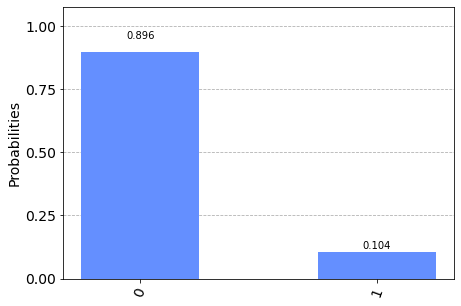

In [89]:
# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts(tc)
print(exp_counts)
plot_histogram(exp_counts)

In [90]:
#yay! As you can see it got it right 89.6% of the time! This means that there's a lot of noise in the real quantum computer
#But we preformed QUANTUM TELEPROTATION inside a REAL Quantum computer! Super Super cool!